# Clustering case with Python

Varejo S.A. is an e-commerce that sells products for all segments (Kitchen, electronics, mobile, smartphones, etc.).

In the last year, against competitors, it has expanded its customer base by 200%. With this expansion, the C-Level saw the opportunity to raise the RFV indicators. RFV is a well-known metric in sales where:

Recency (R) – Time the customer made the last purchase (In days)

Frequency (F) - Quantity of purchases made by the customer

Value (V) - Average Ticket Value spent by the customer

For Varejo S.A. be able to identify these profiles that exist within your platform, the
CEO contacted DNC to help them. He said he knows about the quality and ability of the students
who study there. With that, the school chose you for this mission.

Data Dictionary:

- Sell Date
- Product
- Quantity
- Unit Price
- Customer ID
- Last Purchase Order

## Data Understanding

In [1]:
## impor the libraries

import pandas as pd
import numpy as np
import datetime
from datetime import date
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [5]:
# Importing the dataset

df = pd.read_excel('ecommerce2.xlsx')

In [4]:
df.head()

,order,product,order_date,qt,unit_price,customer_id,last_buy
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,2021-06-06 08:26:00,6,2.55,17850.0,2021-08-16
1,536366,HAND WARMER UNION JACK,2021-06-06 08:28:00,6,1.85,17850.0,2021-08-16
2,536367,ASSORTED COLOUR BIRD ORNAMENT,2021-06-06 08:34:00,32,1.69,13047.0,2022-05-14
3,536368,JAM MAKING SET WITH JARS,2021-06-06 08:34:00,6,4.25,13047.0,2022-05-14
4,536369,BATH BUILDING BLOCK WORD,2021-06-06 08:35:00,3,5.95,13047.0,2022-05-14


In [7]:
# Checking unique values

df.nunique()

order          25832
product         3003
order_date     23177
qt               137
unit_price       633
customer_id     4372
last_buy         304
dtype: int64

In [8]:
# Checking if we have null values

(df.isna().sum()/df.shape[0]).map("{:.2%}".format)

order           0.00%
product         5.63%
order_date      0.00%
qt              0.00%
unit_price      0.00%
customer_id    14.10%
last_buy       14.10%
dtype: object

As we are focused on ours customers, and we have 14.10% of null customer ids, we will drop these values as we don't know what customer it is.

In [9]:
df.dropna(inplace=True)

In [10]:
(df.isna().sum()/df.shape[0]).map("{:.2%}".format)

order          0.00%
product        0.00%
order_date     0.00%
qt             0.00%
unit_price     0.00%
customer_id    0.00%
last_buy       0.00%
dtype: object

## Data Preparation

In [11]:
# Creating a columns to calculate the amount of purchase of each order

df['amount'] = df['unit_price'] * df['qt']
df.head()

,order,product,order_date,qt,unit_price,customer_id,last_buy,amount
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,2021-06-06 08:26:00,6,2.55,17850.0,2021-08-16,15.30
1,536366,HAND WARMER UNION JACK,2021-06-06 08:28:00,6,1.85,17850.0,2021-08-16,11.10
2,536367,ASSORTED COLOUR BIRD ORNAMENT,2021-06-06 08:34:00,32,1.69,13047.0,2022-05-14,54.08
3,536368,JAM MAKING SET WITH JARS,2021-06-06 08:34:00,6,4.25,13047.0,2022-05-14,25.50
4,536369,BATH BUILDING BLOCK WORD,2021-06-06 08:35:00,3,5.95,13047.0,2022-05-14,17.85


Now that we have all of our data correct, we will start to work on a dataset based on each customer

In [13]:
# Group by the amount of each customer

df_amount = df.groupby('customer_id')['amount'].sum()
df_amount = df_amount.reset_index()
df_amount.columns = ['customer_id', 'amount']
df_amount.head()

,customer_id,amount
0,12346.0,28.08
1,12347.0,163.16
2,12348.0,331.36
3,12349.0,15.00
4,12350.0,25.20


In [14]:
# Group by frequency of each customer

df_frequency = df.groupby('customer_id')['order'].count()
df_frequency = df_frequency.reset_index()
df_frequency.columns = ['customer_id', 'frequency']
df_frequency.head()

,customer_id,frequency
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


Creating a column to calculate recency of each row (order) by today date (07/04/2022)

In [15]:
# Tranform to correct type

df['order_date'] = pd.to_datetime(df['order_date'],format='%Y-%m-%d')
df['last_buy'] = pd.to_datetime(df['last_buy'],format='%Y-%m-%d')
df['today'] = date.today()
df['today'] = pd.to_datetime(df['today'],format='%Y-%m-%d')
df['datediff'] = df['today'] - df['last_buy']

In [17]:
# Group by Recency

df_recency = df.groupby('customer_id')['datediff'].min()
df_recency = df_recency.reset_index()
df_recency.columns = ['customer_id', 'recency']
df_recency.head()

,customer_id,recency
0,12346.0,345 days
1,12347.0,22 days
2,12348.0,95 days
3,12349.0,38 days
4,12350.0,330 days


In [18]:
df_recency['recency'] = df_recency['recency'].dt.days

Merging all datasets created

In [20]:
df_final = pd.merge(df_amount, df_frequency, on='customer_id', how='inner')

In [21]:
df_final = pd.merge(df_final, df_recency, on='customer_id', how='inner')

In [22]:
df_final

,customer_id,amount,frequency,recency
0,12346.0,28.08,2,345
1,12347.0,163.16,7,22
2,12348.0,331.36,4,95
3,12349.0,15.00,1,38
4,12350.0,25.20,1,330
...,...,...,...,...
4367,18280.0,23.70,1,297
4368,18281.0,5.04,1,200
4369,18282.0,45.50,3,27
4370,18283.0,66.75,16,23


Calculating the average ticket (amount/frequency)

In [23]:
df_final['average_ticket'] = df_final['amount']/df_final['frequency']
df_final.head()

,customer_id,amount,frequency,recency,average_ticket
0,12346.0,28.08,2,345,14.040000
1,12347.0,163.16,7,22,23.308571
2,12348.0,331.36,4,95,82.840000
3,12349.0,15.00,1,38,15.000000
4,12350.0,25.20,1,330,25.200000


## Modeling

Text(0.5, 0, 'attributes')

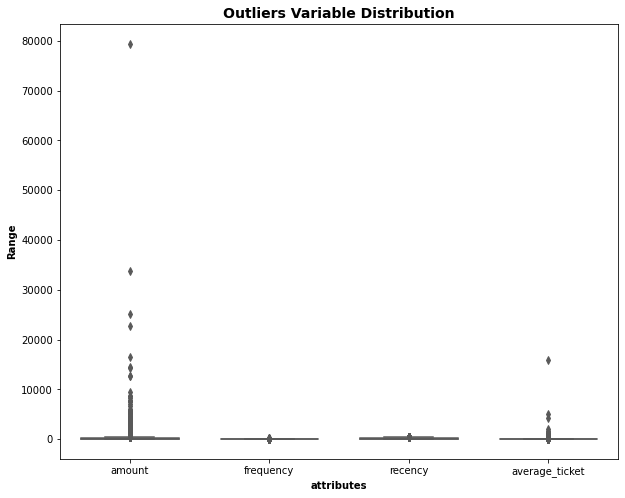

In [24]:
# Checking if we have outliers

attributes = ['amount',	'frequency', 'recency',	'average_ticket']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = df_final[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("attributes", fontweight = 'bold')

In [25]:
# Removing Outliers

Q1 = df_final.amount.quantile(0.05)
Q3 = df_final.amount.quantile(0.95)
IQR = Q3 - Q1
df_final = df_final[(df_final.amount >= Q1 - 1.5*IQR) & (df_final.amount <= Q3 + 1.5*IQR)]

Q1 = df_final.average_ticket.quantile(0.05)
Q3 = df_final.average_ticket.quantile(0.95)
IQR = Q3 - Q1
df_final = df_final[(df_final.average_ticket >= Q1 - 1.5*IQR) & (df_final.average_ticket <= Q3 + 1.5*IQR)]

Q1 = df_final.recency.quantile(0.05)
Q3 = df_final.recency.quantile(0.95)
IQR = Q3 - Q1
df_final = df_final[(df_final.recency >= Q1 - 1.5*IQR) & (df_final.recency <= Q3 + 1.5*IQR)]

Q1 = df_final.frequency.quantile(0.05)
Q3 = df_final.frequency.quantile(0.95)
IQR = Q3 - Q1
df_final = df_final[(df_final.frequency >= Q1 - 1.5*IQR) & (df_final.frequency <= Q3 + 1.5*IQR)]

In [26]:
# Normalizing our dataset

df_final = df_final[['amount',	'frequency', 'recency',	'average_ticket']]

scaler = StandardScaler()

df_final_scaled = scaler.fit_transform(df_final)
df_final_scaled.shape

df_final_scaled = pd.DataFrame(df_final_scaled)
df_final_scaled.columns = ['amount', 'frequency', 'recency', 'average_ticket']
df_final_scaled.head()

,amount,frequency,recency,average_ticket
0,-0.480201,-0.485229,2.311210,-0.470960
1,0.100632,0.587942,-0.899287,-0.200611
2,0.823879,-0.055961,-0.173695,1.535829
3,-0.536444,-0.699863,-0.740253,-0.442959
4,-0.492584,-0.699863,2.162116,-0.145440


Checking the best number of cluster with Elbow Method

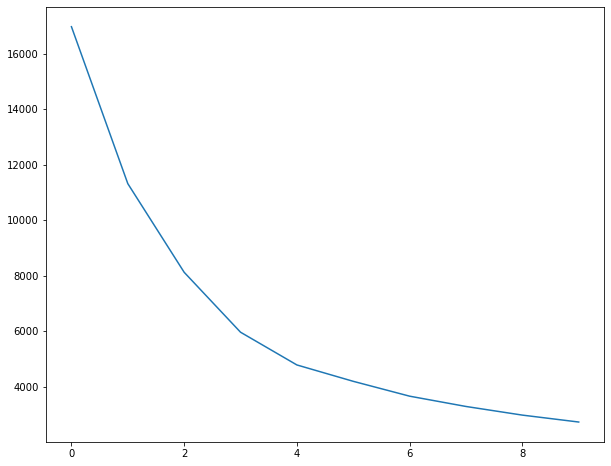

In [27]:
ssd = []
n_clusters = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for num_clusters in n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_final_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)

Creating the columns cluster id to classify each customer

In [28]:
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(df_final_scaled)
df_final['cluster'] = kmeans.labels_
df_final.head()

,amount,frequency,recency,average_ticket,cluster
0,28.08,2,345,14.040000,1
1,163.16,7,22,23.308571,0
2,331.36,4,95,82.840000,3
3,15.00,1,38,15.000000,0
4,25.20,1,330,25.200000,1


<AxesSubplot:xlabel='cluster', ylabel='recency'>

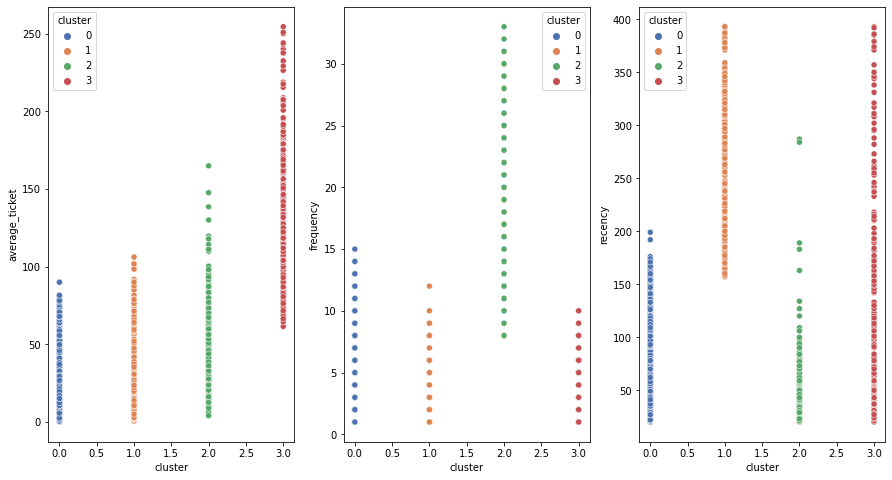

In [29]:
# Comparing each cluster

f, axes = plt.subplots(1, 3,figsize=(15, 8))
sns.scatterplot(data=df_final,x='cluster',y='average_ticket',hue='cluster',ax=axes[0],palette="deep")
sns.scatterplot(data=df_final,x='cluster',y='frequency',hue='cluster',ax=axes[1],palette="deep")
sns.scatterplot(data=df_final,x='cluster',y='recency',hue='cluster',ax=axes[2],palette="deep")


## Final Analysis

We can see in the image above that we foun 4 clusters, ie we have 4 types of customers:

Cluster 0:

This customer has the lowest average ticket, medium frequency and medium recency.
This customer does not buy too much and when buy it's products with a low price, as the avertage ticket is low too.


Cluster 1:

It looks like the cluster 0, but the frequency is the lowest and recency is the biggest. We need to understand what kind of product this customer is buying so we can orinted ads and promotions to penetrate this market.


Cluster 2:

It's the perfect customer, high average ticket, high frequency and low recency. We need to keep these customers.


Cluster 3:

High average ticket but with low frequency and high recency. Maybe this type of customer only buy when a new project is in progress and they only buy once per year or more.